# Projekat 1 - nadgledano učenje

**Dataset:** http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

**Definicija problema:** Na osnovu parametara sa senzora za temperaturu, vlažnost vazduha, koncentraciju CO2 i osvetljenja odrediti da li je u prostoriji prisutna neka osoba.

**Vrsta problema:** binarna klasifikacija

## Podaci o datasetu

Izabrani dataset sadrži *time-series* podatke očitane sa senzora postavljenih u jednoj kancelariji. 

## Učitavanje celokupnog skupa podataka

Do sada smo radili sa delom skupa podataka. Ceo skup podataka sastoji se iz 3 datoteke:
1. _datatest_
2. _datatest2_
3. _datatrain_

Potrebno je učitati sve ove podatke, spojiti ih u jedinstveni skup podataka i zatim izvršiti preprocesiranje i podelu na trening i test podatke.

Broj uzoraka u kompletnom skupu podataka jeste **20560**. Izdvaja se kategorički atribut Occupancy i skup se dalje deli na trening i test skupove u razmeri 80%-20% sa mešanjem podataka. Broj uzoraka u trening skupu iznosi **16448**, a broj uzoraka u test skupu je **4112**.



In [196]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set(style="darkgrid")

dataTest2 = pd.read_csv("occupancy_data/datatest2.txt", sep=',')
dataTest = pd.read_csv("occupancy_data/datatest.txt", sep=',')
dataTrain = pd.read_csv("occupancy_data/datatraining.txt", sep=',')

data= pd.concat([dataTest,dataTrain,dataTest2],axis=0)

data.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
145,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
146,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
147,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
148,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
149,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


##### Broj uzoraka:

In [197]:
len(data)

20560

### Atributi dataseta

1. **_Date_** - Datum i vreme merenja.
2. **_Temperature_** - Temperatura u prostoriji izražena u stepenima Celzijusa. Kontinualne numeričke vrednosti.
3. **_Humidity_** - Vlažnost vazduha izražena u procentima. Kontinualne numeričke vrednosti.
4. **_Light_** - Osvetljenje u prostoriji izraženo u luksima. Kontinualni numerički podatak.
5. **_CO2_** - Koncentracija ugljen-dioksida u prostoriji izražena u ppm (*parts per million*). Kontinualni numerički podatak.
6. **_HumidityRatio_** - Odnos *kgwater-vapor/kg-air* (broj kilograma vodene pare po kilogramu vazduha). Kontinualni numerički podatak.
7. **_Occupancy_** - Binarni podatak koji govori da li u prostoriji ima nekog ili je prazna.

### Deskriptivna analiza dataseta

Sledeći isečak koda prikazuje distribuciju klasa u datasetu:

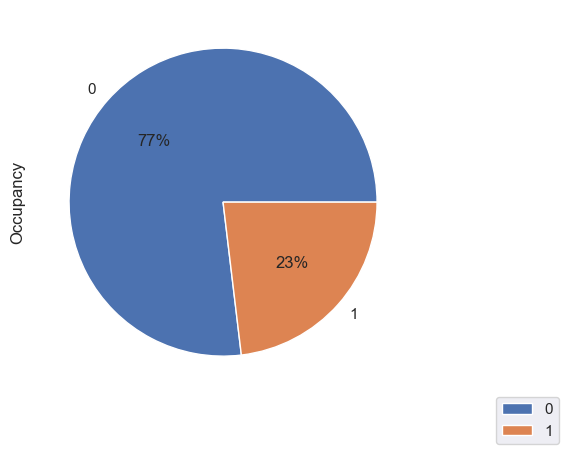

In [198]:
plt.figure(figsize=(7, 5))
pie = data.Occupancy.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.savefig("graphs/classdistribution.jpg")
plt.show()

Na dijagramu se može videti distribucija klasa u skupu podataka. Plavi deo dijagrama odgovara vrednosti 0 koja kodira stanje prazne prostorije, dok narandžasti deo odgovara vrednosti 1 koja kodira prisutnost osobe u prostoriji. Ovo su dve klase kojima jedan uzorak može da pripada, a cilj projekta biće razvijanje modela koji podatak klasifikuje u jednu od ove dve klase.

In [199]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


Vrednosti za Light i CO2 imaju najveći opseg, pa je korisno ispitati njihovu distribuciju.

##### *Skewness plot* za Light:

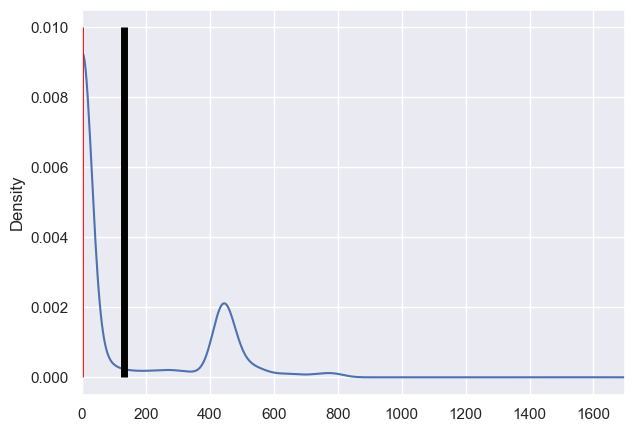

In [200]:
skewplot = data.Light.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min(),data.Light.max()));
plt.vlines(data.Light.mean(), 
           ymin=0, 
           ymax=0.01,
           linewidth=5.0,
           color="black");
plt.vlines(data.Light.median(),
           ymin=0, 
           ymax=0.01, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-light.jpg")
plt.show()

##### *Boxplot* za Light:

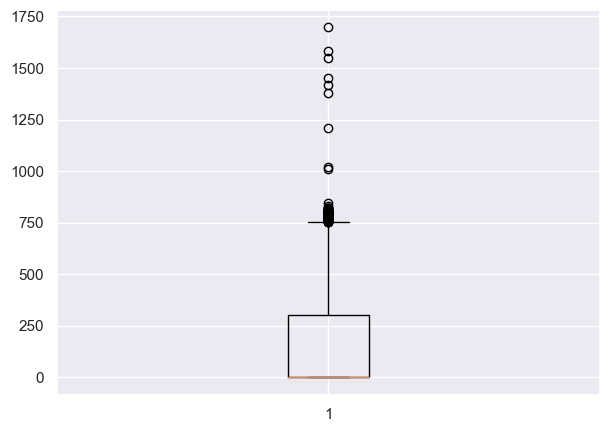

In [201]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-light.jpg")
plt.show()

##### *Skewness plot* za CO2:

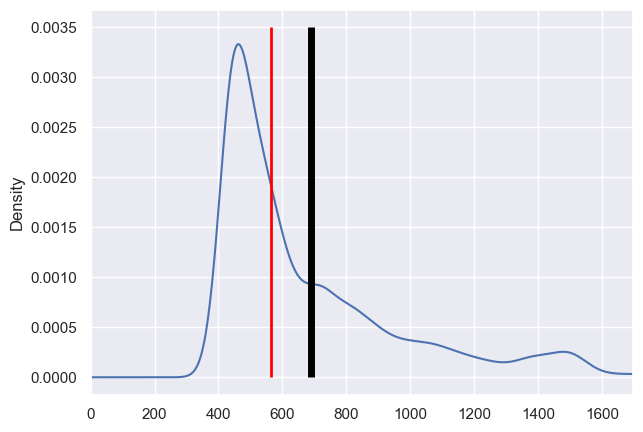

In [202]:
skewplot = data.CO2.plot(kind="density",
              figsize=(7,5),
              xlim=(data.Light.min(),data.Light.max()));
plt.vlines(data.CO2.mean(), 
           ymin=0, 
           ymax=0.0035,
           linewidth=5.0,
           color="black");
plt.vlines(data.CO2.median(),
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red");

plt.savefig("graphs/skewplot-CO2.jpg")
plt.show()

##### *Boxplot* za CO2:

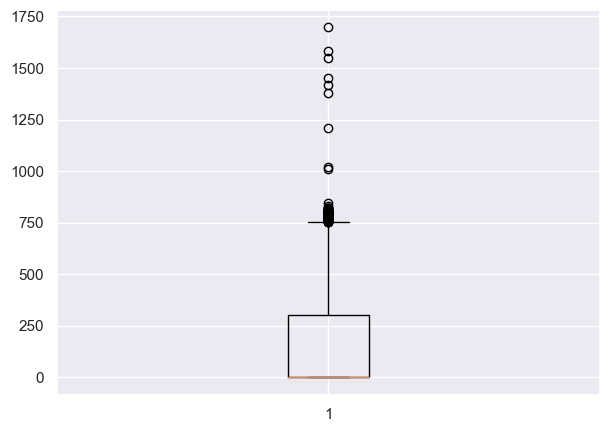

In [203]:
plt.figure(figsize=(7, 5))
boxplot = plt.boxplot(data.Light)
plt.savefig("graphs/boxplot-CO2.jpg")
plt.show()

Na osnovu ova 4 grafika može se primetiti da ovi atributi imaju značajan broj *outlier*-a.

Na dijagramu ispod može se videti korelacija između podataka:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Temperature'),
  Text(1.5, 0, 'Humidity'),
  Text(2.5, 0, 'Light'),
  Text(3.5, 0, 'CO2'),
  Text(4.5, 0, 'HumidityRatio'),
  Text(5.5, 0, 'Occupancy')])

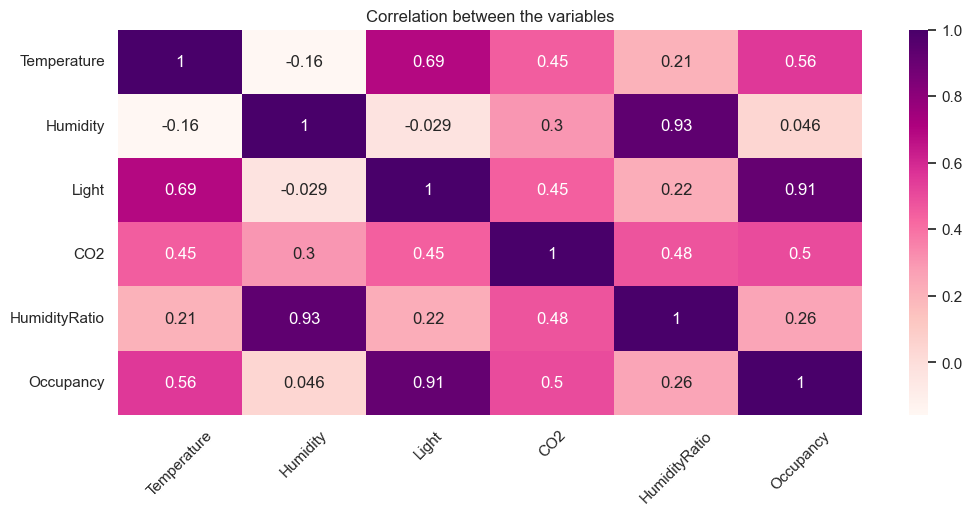

In [204]:
plt.subplots(figsize=(12,5))
gender_correlation=data.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

## Preprocesiranje podataka

Na osnovu pregleda dataseta uočava se da su svi atributi osim _Date_ atributa numerički. Kako bi se podaci pripremili za primenu algoritma mašinskog učenja, potrebno je _Date_ podatke, koji su tipa _string_, pretopiti u numerički format.

U te svrhe najpre ćemo isprobati konverziju datuma i vremena u milisekunde:

In [205]:
data['date'] = [pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S') for date in data['date']]
data['date'] = pd.DatetimeIndex(data.date).asi8
data['date'].head(2)

140    1422886740000000000
141    1422886799000000000
Name: date, dtype: int64

Može se uočiti iz sledećeg isečka koda da ne postoje podaci kojima nedostaju vrednosti

In [206]:
data.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Sledeći korak predstavlja izdvajanje kategoričke vrednosti od ostalih atributa skupa podataka:

In [207]:
cols = [col for col in data.columns if col not in ['Occupancy']]
data_features = data[cols]
target = data['Occupancy']
data_features.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio
140,1422886740000000000,23.700,26.272,585.2,749.2,0.004764
141,1422886799000000000,23.718,26.290,578.4,760.4,0.004773


Nakon odstranjivanja kategoričke vrednosti, koja zapravo predstavlja ciljni atribut, potrebno je podeliti skup podataka u train i test podatke. Test podaci predstavljaju ukupno 20% originalnog skupa podataka.

In [208]:
from sklearn.model_selection import train_test_split

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")

Broj uzoraka u trening skupu podataka: 16448
Broj uzoraka u test skupu podataka: 4112


Podaci su pretrpeli minimalne izmene koje su potrebne za primenu bilo kog algoritma mašinskog učenja. Sledeća slika predstavlja najbolju praksu za primenu algoritama mašinskog učenja na osnovu zadatka koji se rešava (preuzeto sa _sklearn_ dokumentacije):

![ml-algorithms-best-practice.png](resource_images/ml-algorithms-best-practice.png)

Preporuka je da se za skupove podataka sa manje od 100 000 uzoraka krene od linearnog SVC, što je primenjeno u sledećem isečku koda:

In [209]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import io

svc_model = LinearSVC(random_state=0)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred)
with io.open('evaluation/classification_report.txt','w',encoding='utf-8') as f: f.write(report)


LinearSVC accuracy :  0.7621595330739299


c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

_Sklearn_ daje warning koji govori da model nije uspeo da konvergira ka rešenju. Ovakav problem nastaje usled loše balansiranih atributa - atributi _Light_ i _CO2_, kao i transformisani _Date_ atribut, su velike vrednosti. U slučaju Light i CO2 atributa, postoji i dosta _outlier_-a. Kako bi se ovaj problem otklonio, može se primeniti _scaler_ na podatke u cilju njihove normalizacije.


U sledećem isečku koda može se videti da model uopšte ne prepoznaje postojanje druge klase podataka (klase kodirane brojem 1 koji označava prisutost osobe u prostoriji):

In [210]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, pred))

[[3134    0]
 [ 978    0]]


Primenom _MinMaxScaler_-a na postojeće podatke dolazi se do modela koji može da konvergira ka rešenju. Izvršena je evaluacija tačnosti modela, kao i određivanje matrice zabune. Izveštaj o klasifikaciji snimljen je u direktorijumu _evaluation_ u datoteci "classification_report_scaler.txt".

In [211]:
from sklearn import preprocessing
from sklearn.svm import SVC

scaler = preprocessing.MinMaxScaler()

svc_model = SVC(kernel="linear",random_state=0,probability=True)

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
report = classification_report(target_test,pred)
with io.open('evaluation/classification_report_scaler.txt','w',encoding='utf-8') as f: f.write(report)
print(confusion_matrix(target_test, pred))


LinearSVC accuracy :  0.9880836575875487
[[3087   47]
 [   2  976]]


#### Diskusija rezultata

Linearni SVC model treniran na skaliranim skupom podataka daje tačnost od 98,81%. 

Iz matrice zabune uočava se sledeće:
- model klasifikuje 3087 uzoraka klase 0 pozitivno, dok za 2 uzorka greši u klasifikaciji prepoznajući ih kao klasu 1. 
- 976 uzoraka klase 1 prepoznato je pravilno, a greška je načinjena za svega 47 uzoraka

Prevedeno u procente, model greši u 0,065% klasifikacija za klasu 0, ali zato za klasu 1 greši u 4.594%. Cilj daljih poboljšanja treba da bude balansiranje greške tako da se procenat ujednači.

Radi lakšeg rada, definisali smo funkciju koja služi za iscrtavanje i snimanje matrice zabune kao tabelarni prikaz sa podacima u procentima:

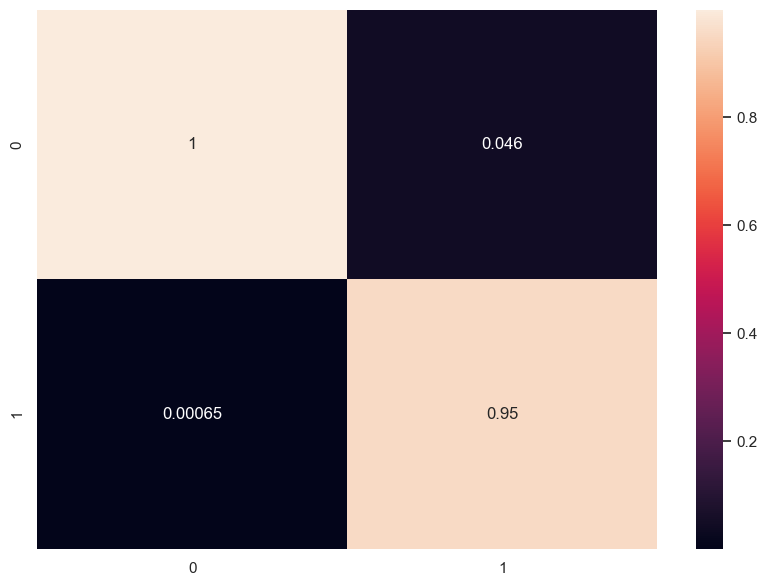

In [212]:
def plot_cfm(target_test, pred, cfm_file_name: str):
    cfm_result = confusion_matrix(target_test, pred, normalize="pred")
    classes = ["0", "1"]
    df_cfm = pd.DataFrame(cfm_result, index = classes, columns = classes)
    plt.figure(figsize = (10,7))
    cfm_plot = sns.heatmap(df_cfm, annot=True)
    cfm_plot.figure.savefig(f"evaluation\{cfm_file_name}.png")

plot_cfm(target_test, pred, "cfm_initial")

Iz matrice zabune može se videti da model pogrešno klasifikuje klasu 0 kao klasu 1 u 0,065% slučajeva, što je manje u odnosu na model dobijen treniranjem nad manjim skupom podataka. Sa druge strane, model pogrešno klasifikuje klasu 1 kao klasu 0 u 4,6% slučajeva, što je ponovo bolje u odnosu na prethodni model.

Iako je tačnost modela relativno slična, ovaj model pravi manje grešaka u klasifikacijama pojedinačnih klasa. Međutim, i dalje treba raditi na balansiranju greške u klasifikaciji obe klase.

> _Napomena: u tabelarnom prikazu matrice zabune stoji da model klasifikuje klasu 0 pozitivno u 100% slučajeva, a da je klasifikuje pogrešno u 0,065% slučajeva. Ovakav ispis nastaje usled seaborn-ovog zaokruživanja brojeva na veću decimalu, dok je realna situacija da model klasifikuje klasu 0 kao pozitivnu u 99.935% slučajeva._

### Podela atributa _date_ na više atributa

Do sada smo radili sa atributom _date_ u obliku _timestamp_-a u nanosekundama. U cilju poboljšanja rada algoritma, ovaj atribut ćemo podeliti na dva atributa - koji je dan u nedelji i koliko je sekundi prošlo od početka tog dana (odnosno, od ponoći). Ovakva podela može biti relevantna usled prirode skupa podataka. Podaci su skupljani u intervalima od jednog minuta u okviru kancelarijske prostorije, tako da uticaj dana u nedelji i tačnog doba dana može doprineti poboljšanju klasifikacije.

Novi atributi su sledećeg formata:

- _dayOfWeek_: ordinal, numerički zapis dana u nedelji, gde 0 predstavlja ponedeljak a 6 predstavlja nedelju
- _secondsSinceMidnight_: numerički kontinualan podatak koji iskazuje sekunde od ponoći datog dana

Sledeći isečak koda deli atribut _date_ na atribute _dayOfWeek_ i _secondsSinceMidnight_:

In [213]:
data['date'] = pd.to_datetime(data['date'], unit='ns')
data['dayOfWeek'] = data['date'].dt.day_of_week
data['secondsSinceMidnight'] = data['date'].apply(lambda x: (x.hour * 3600 + x.minute * 60 + x.second))
p = data.describe()
print(p)
data.head(2)


        Temperature      Humidity         Light           CO2  HumidityRatio  \
count  20560.000000  20560.000000  20560.000000  20560.000000   20560.000000   
mean      20.906212     27.655925    130.756622    690.553276       0.004228   
std        1.055315      4.982154    210.430875    311.201281       0.000768   
min       19.000000     16.745000      0.000000    412.750000       0.002674   
25%       20.200000     24.500000      0.000000    460.000000       0.003719   
50%       20.700000     27.290000      0.000000    565.416667       0.004292   
75%       21.525000     31.290000    301.000000    804.666667       0.004832   
max       24.408333     39.500000   1697.250000   2076.500000       0.006476   

          Occupancy     dayOfWeek  secondsSinceMidnight  
count  20560.000000  20560.000000          20560.000000  
mean       0.231031      2.896109          42997.431031  
std        0.421503      2.059338          25497.938212  
min        0.000000      0.000000              

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,dayOfWeek,secondsSinceMidnight
140,2015-02-02 14:19:00,23.700,26.272,585.2,749.2,0.004764,1,0,51540
141,2015-02-02 14:19:59,23.718,26.290,578.4,760.4,0.004773,1,0,51599


Sada je potrebno izbaciti atribut _date_ i izdvojiti kategorički atribut _Occupancy_:

In [214]:
cols = [col for col in data.columns if col not in ['Occupancy','date']]
data_features = data[cols]
target = data['Occupancy']
data_features.head(2)

,Temperature,Humidity,Light,CO2,HumidityRatio,dayOfWeek,secondsSinceMidnight
140,23.700,26.272,585.2,749.2,0.004764,0,51540
141,23.718,26.290,578.4,760.4,0.004773,0,51599


Dalje, koristimo transformisane podatke da istreniramo model:

In [215]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

print(len(data_train))
print(len(data_test))

scaler = preprocessing.MinMaxScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))



16448
4112
LinearSVC accuracy :  0.9892996108949417
[[3092   42]
 [   2  976]]


Performanse modela sa podelom atributa _date_ su neznatno bolje u odnosu na performanse modela koji koristi integralni _date_ atribut (98.81% u poređenju sa 98.93%). 

Sledeći isečak koda primenjuje _StandardScaler_ na podatke u cilju daljeg poboljšanja performansi:

In [216]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9897859922178989
[[3094   40]
 [   2  976]]


Sledeći isečak koda primenjuje _RobustScaler_ na podatke u cilju daljeg poboljšanja performansi:

In [217]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.RobustScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))

LinearSVC accuracy :  0.9895428015564203
[[3093   41]
 [   2  976]]


Može se primetiti da od prethodno iskorišćenih _scaler-a StandardScaler_ pokazuje najbolje performanse.

In [218]:
data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=10)

scaler = preprocessing.StandardScaler()

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print(confusion_matrix(target_test, pred))
report = classification_report(target_test, pred)
with io.open('evaluation/classification_report_LinearSVC.txt', 'w', encoding='utf-8') as f: f.write(report)

LinearSVC accuracy :  0.9897859922178989
[[3094   40]
 [   2  976]]


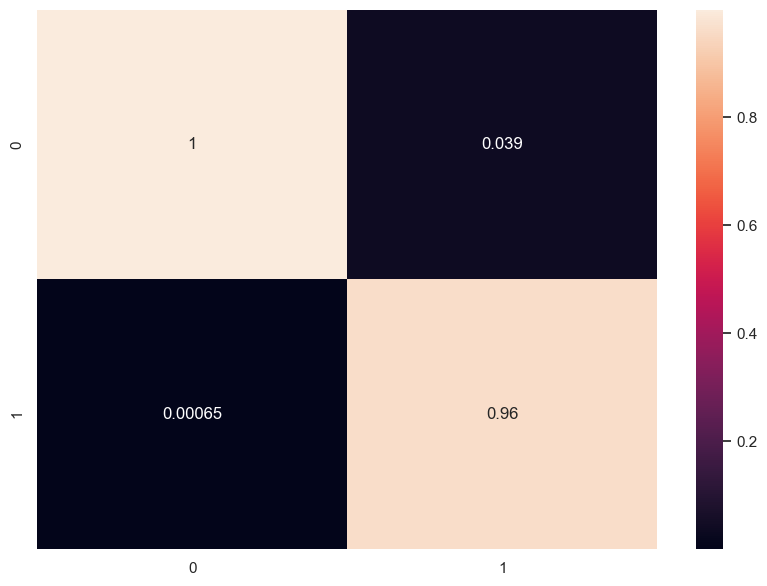

In [219]:
plot_cfm(target_test, pred, "cfm2")

Proverićemo ROC (_Receiver Operating Statistic_) modela:

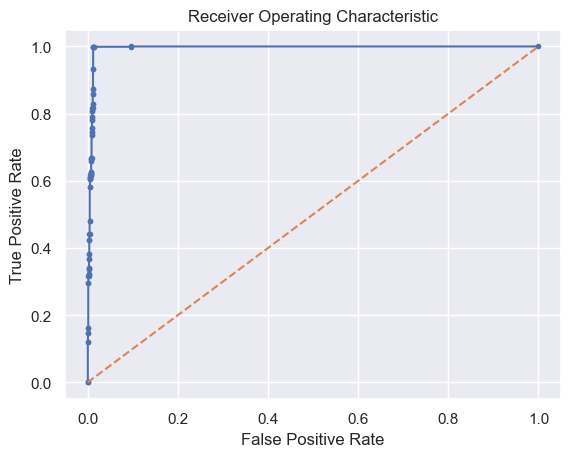

ROC AUC=0.994


In [220]:
from sklearn.metrics import roc_curve, roc_auc_score

target_probabilities = svc_model.predict_proba(data_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, marker='.')
plt.plot([0, 1], ls="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

lr_auc = roc_auc_score(target_test, target_probabilities)
print('ROC AUC=%.3f' % (lr_auc))


Po izgledu grafika, može se reći da model vrši skoro savršenu klasifikaciju. Računanjem procentualne površine ispod ROC krive dobija se 99,4%, što je skoro savršen rezultat.

In [221]:
print(svc_model.n_support_)
print(len([x for x in target_train if x == 0]))
print(len([x for x in target_train if x == 1]))

[254 255]
12676
3772


Budući da je iskorišćen _Support Vector_ model, korisno je pogledati koliko vektora iz ulaznog skupa podataka su _support_ vektori za model.

Na osnovu izvršenja prethodnog isečka koda, vidi se da za klasu 0 postoji 254 _support_ vektora od ukupno 12676, dok je za klasu 1 uzeto 255 vektora kao _support_ vektori od ukupno 3772.

```
TODO: pitati profesora za ove parametre?
```

## _Decision Tree_ klasifikator

Do sada smo koristili _Support Vector_ klasifikator, koji na osnovu skupa uzoraka pronalazi ključne i formira hiperravan koja deli dve klase podataka. 

Još jedan algoritam za klasifikaciju jeste _Decision Tree_ klasifikator, koji na osnovu vrednosti atributa deli skup uzoraka na više podskupova iterativno sve dok ne formira stablo čiji su čvorovi podskupovi ulaznog skupa podataka gde svaki član pripada samo jednoj klasi.

U sledećem isečku koda treniramo _Decision Tree_ klasifikator na istom skupu podataka:

In [222]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

print("DecisionTree accuracy : ", accuracy_score(target_test, predDT, normalize = True))
print(confusion_matrix(target_test, predDT))
report = classification_report(target_test, predDT)
with io.open('evaluation/classification_report_DecisionTree_1.txt', 'w', encoding='utf-8') as f: f.write(report)

DecisionTree accuracy :  0.992704280155642
[[3118   16]
 [  14  964]]


Istrenirani _Decision Tree_ klasifikator postiže tačnost klasifikacije od 99,27%, što je znatno bolje u odnosu na _Support Vector_ klasifikator (98,98%). Obzirom da su iskorišćeni isti podaci sa istim primenjenim transformacijama, dobro bi bilo istražiti mogućnosti _Decision Tree_ klasifikatora u formi podešavanja njegovih parametara.

#### Vizuelizacija stabla odluke

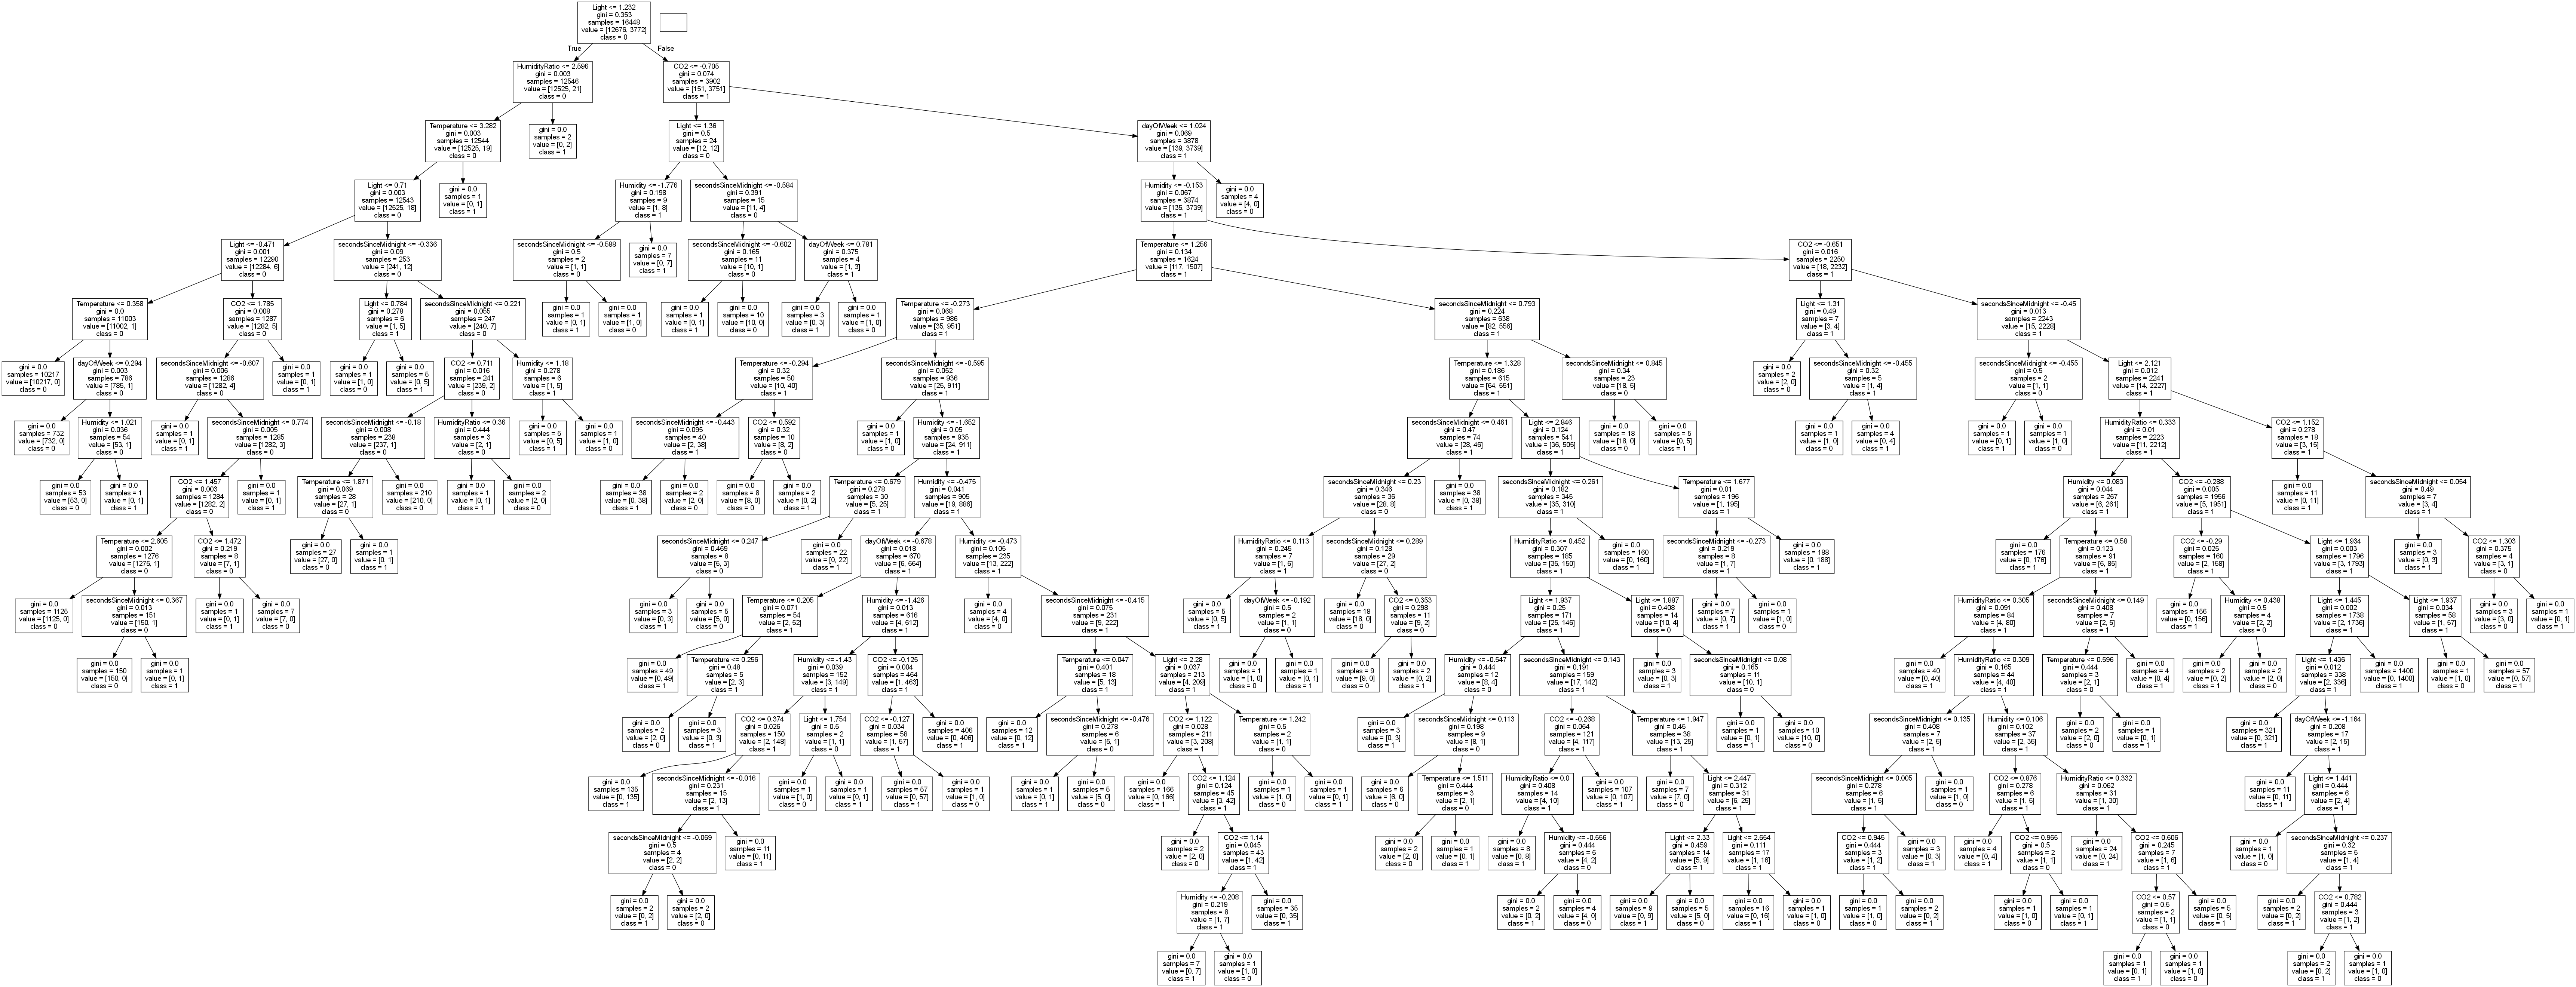

In [223]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(decisionTree,
 out_file=None,
feature_names=data_features.columns,
 class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

Na slici je prikaz vizuelizacije stabla odluke koje je generisao algoritam. Stablo je veoma široko sa dosta grananja, tako da bi moguća optimizacija bila podešavanje parametara koji bi minimizovali broj odluka koje se moraju sprovesti pri klasifikaciji.

## _Random Forest_ klasifikator

_Random Forest_ klasifikator kreira više stabla odluke koje trenira nad podskupovima trening skupa, gde svako stablo odluke dobija drugačije funkcije odluke na grananjima. Na kraju bira najoptimalnije stablo, koje predstavlja istrenirani algoritam.

Sledeći deo koda predstavlja treniranje i evaluaciju _Random Forest_ klasifikatora nad istim skupom podataka sa istim transformacijama pri preprocesiranju:

In [224]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(random_state=0, criterion="entropy") 
# kod decision tree smo koristili gini criterion, možda bi mogli da probamo gini i ovde?

randomForestModel = randomForest.fit(data_train, target_train)

predRFC = randomForestModel.predict(data_test)

print("RandomForest accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
print(confusion_matrix(target_test, predRFC))
report = classification_report(target_test,predRFC)
with io.open('evaluation/classification_report_RandomForest_1.txt','w',encoding='utf-8') as f: f.write(report)

RandomForest accuracy :  0.9944066147859922
[[3117   17]
 [   6  972]]


Ovaj model postiže tačnost od 99,44%, što je bolje od _Decision Tree_ modela (99,27%).

#### Optimizacija _Random Forest_ modela izborom relevantnih atributa

_Random Forest_ model se može poboljšati izbacivanjem atributa koji manje utiču na klasifikaciju. Odluka o tome koje atribute treba izbaciti svodi se na ispitivanje važnosti atributa za već istrenirani model:

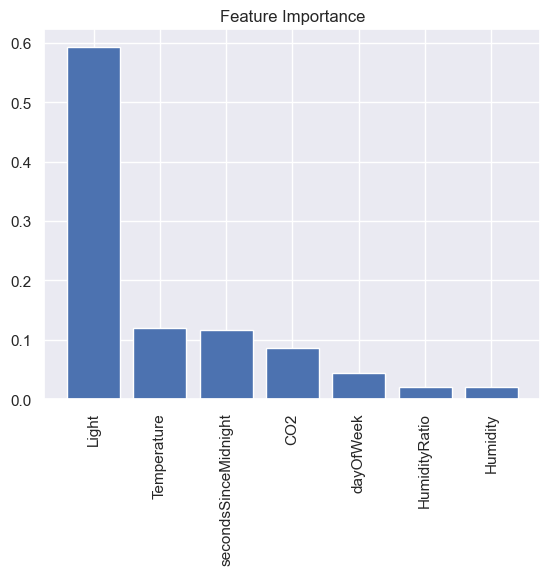

In [225]:
importances = randomForestModel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data_features.columns[i] for i in indices]

plt.figure()

plt.title("Feature Importance")

plt.bar(range(data_train.shape[1]), importances[indices])

plt.xticks(range(data_train.shape[1]), names, rotation=90)

plt.show()

Sa grafika se vidi da atribut _Light_ najviše utiče na rezultate klasifikacije. Atributi _Temperature_, _secondsSinceMidnight_ i _CO2_ imaju znatno manji uticaj na klasifikaciju, dok atributi _dayOfWeek_, _HumidityRatio_ i _Humidity_ gotovo da ne utiču na rezultate klasifikacije.

Iz tih razloga, izbacićemo sve atribute čiji je uticaj na klasifikaciju manji od 0,1.

Sledeći deo koda selektuje atribute koji imaju značaj veći od 0,1 i trenira novi model nad transformisanim skupom podataka:

In [226]:
from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(randomForest, threshold=th) 

    features_important = selector.fit_transform(data_train, target_train)

    test_important = selector.transform(data_test)

    randomForestModel = randomForest.fit(features_important,target_train)

    predRFC = randomForestModel.predict(test_important)

    print("RandomForest accuracy : ",accuracy_score(target_test, predRFC, normalize = True))
    print(confusion_matrix(target_test, predRFC))
    report = classification_report(target_test,predRFC)
    with io.open(f'evaluation/classification_report_RandomForest_Threshold_{th}.txt','w',encoding='utf-8') as f: f.write(report)

selectFeaturesRF(0.1)

RandomForest accuracy :  0.9929474708171206
[[3111   23]
 [   6  972]]


Modela sa izbačenim parametrima koji imaju uticaj na klasifikaciju manji od 0.1 ima manju preciznost u odnosu na model treniran sa tim parametrima (99,29% u odnosu na 99,44%).
Iz tog razloga pokušaćemo sa _threshold-om_ od 0.05.

In [227]:
selectFeaturesRF(0.05)

RandomForest accuracy :  0.9941634241245136
[[3118   16]
 [   8  970]]


Za _threshold_ od 0.05 dobijamo model čija je preciznost veća u odnosu na prethodni model, ali i dalje manja u odnosu na model koji uključuje sve atribute. Isprobaćemo treniranje modela sa _threshold-om_ od 0.025.

In [228]:
selectFeaturesRF(0.025)

RandomForest accuracy :  0.9946498054474708
[[3118   16]
 [   6  972]]


Tačnost ovako istreniranog modela je gotovo ista kao kod modela koji je nastao treniranjem nad skupom podataka sa uključenim atributima. Međutim, greška pri klasifikaciji (_false positives_ i _false negatives_) se neznatno ujednačila.

_Random Forest_ klasifikator ima još hiperparametara koje je moguće podesiti, i na osnovu dobijenih rezultata moguće je dodatno poboljšati model izmenom nekih hiperparametara.

## _KNeighbors_ klasifikator

_K-Nearest Neighbors_ klasifikator zaključuje klasu nekog uzorka na osnovu k-najbližih uzoraka oko njega. 

U sledećem isečku koda implementirano je treniranje _KNeighbors_ klasifikatora nad istim podacima kao do sada:

In [229]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier(n_neighbors=3)

nnModel = nearest_neighbors.fit(data_train,target_train)

predNN = nnModel.predict(data_test)

print("KNeighbors accuracy : ",accuracy_score(target_test, predNN, normalize = True))
print(confusion_matrix(target_test, predNN))
report = classification_report(target_test,predNN)
with io.open('evaluation/classification_report_KNeighbors_1.txt','w',encoding='utf-8') as f: f.write(report)

KNeighbors accuracy :  0.9919747081712063
[[3113   21]
 [  12  966]]


c:\Users\Nikola\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Ovaj algoritam daje neznatno slabiju preciznost u odnosu na Random Forest: 99,2%.

In [230]:
#### TODO GridSearchCV
